# Dutch Energy EDA
#### Looking at three different companies for the year 2018 to see if we can find anything interesting. 
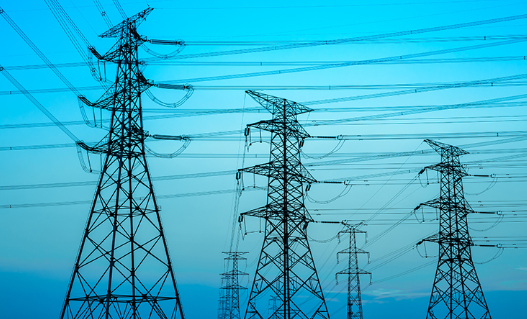

Image taken from fuergy.com

[Link to Kaggle Dataset](https://www.kaggle.com/datasets/lucabasa/dutch-energy)

I selected a portion (3 companies in the year 2018) of the complete dataset of numerous electricity distributions companies in The Netherlands. These companies do not sell anything, it is a grid operator, responsible for maintaining the elextricity and gas distribution in parts of their responsible network.

They:

* Transport electricity

* Maintain electricity infrastructure

* Manage power outages and emergency maintenance

* Connect new customers to the grid.

So, in essence, they are rather attached to Dutch energy suppliers and ensure electricity keeps coming to their customers. They are assigned/hired by the Dutch government and consumers pay a grid fee as part of their energy bill.

[Link to the Wiki page 'Electricity sector in The Netherlands](https://en.wikipedia.org/wiki/Electricity_sector_in_the_Netherlands
)

## The columns definitions:

* net_manager: code of the regional network manager

* purchase_area: code of the area where the energy is purchased

* street: Name of the street

* zipcode_from and zipcode_to: 2 columns for the range of zipcodes covered, 4 numbers and 2 letters

* city: Name of the city

* num_connections: Number of connections in the range of zipcodes

* delivery_perc: percentage of net consumption of electricity. The lower, the more energy was given back to the grid (for example if you have solar panels)

* perc_of_active_connections: Percentage of active connections in the zipcode range

* type_of_connection: principal type of connection in the zipcode range. For electricity is # fuses X # ampère. 

* type_conn_perc: percentage of presence of the principal type of connection in the zipcode range

* annual_consume: Annual consume. Kwh for electricity, m3 for gas

* annual_consume_lowtarif_perc: Percentage of consume during the low tarif hours. From 10 p.m. to 7 a.m. and during weekends.

* smartmeter_perc: percentage of smartmeters in the zipcode ranges


Taken from the Kaggle Dataset link directly

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

df_1 = pd.read_csv('coteq_electricity_2018.csv')
df_2 = pd.read_csv('enduriselectricity_01012018.csv')
df_3 = pd.read_csv('enexis_electricity_01012018.csv')

# Taking a sample of 1000 for each dataframe, to get an even distribution.
df_1 = df_1.sample(1000)
df_2 = df_2.sample(1000)
df_3 = df_3.sample(1000)

# Let's inspect each dataframe one by one to see what we need to clean up.
# This one looks fine.
df_1.head(1)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
2189,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Bleijenbeek,7608NG,7608NG,ALMELO,14,85.71,100.0,93,1x35,2898,85.71,0.0


--- 
## Concatination

In [2]:
# Looks like we need to remove the NETBEHEERDER (Administrator) column, since 
# It appears that this net_manager is in id format. We can fix to broadcast this.
df_2.head(1)

,ï»¿NETBEHEERDER,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
6485,8716902000001,Enduris Netgebied,Henricusdijk,4501PR,4501PS,OOSTBURG,51,100.0,90.2,"76,47",3x25,6068,37.25,0.0


In [3]:
# Now we looked at each of the dataframes, let's change the 
# df_2 net administrator column.

# Renaming the column.
df_2.rename(columns={df_2.columns[0]: 'net_manager'}, inplace=True)

# Assigning each row to a column to a value
# in this case, every row in the column net_manager to Endurise BV
df_2 = df_2.assign(net_manager = 'Endurise BV')
df_2.head(1)


,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
6485,Endurise BV,Enduris Netgebied,Henricusdijk,4501PR,4501PS,OOSTBURG,51,100.0,90.2,"76,47",3x25,6068,37.25,0.0


In [4]:
# Concatenating the three datasets together
df = pd.concat([df_1, df_2, df_3])
df = df.reset_index(drop=True)
df.head(1)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc
0,Coteq Netbeheer BV,Netbeheerder Centraal Overijssel B.V.,Bleijenbeek,7608NG,7608NG,ALMELO,14,85.71,100.0,93,1x35,2898.0,85.71,0.0


--- 
## Data Cleaning

In [5]:
# Checking Nan values
df.isna().sum()

net_manager                     0
purchase_area                   0
street                          0
zipcode_from                    0
zipcode_to                      0
city                            0
num_connections                 0
delivery_perc                   0
perc_of_active_connections      0
type_conn_perc                  0
type_of_connection              0
annual_consume                  0
annual_consume_lowtarif_perc    0
smartmeter_perc                 0
dtype: int64

In [6]:
# Dropping a few columns that aren't useful.
df = df.drop(['zipcode_from','zipcode_to', 'purchase_area','annual_consume_lowtarif_perc','type_conn_perc'], axis=1)
df.head(3)

,net_manager,street,city,num_connections,delivery_perc,perc_of_active_connections,type_of_connection,annual_consume,smartmeter_perc
0,Coteq Netbeheer BV,Bleijenbeek,ALMELO,14,85.71,100.0,1x35,2898.0,0.0
1,Coteq Netbeheer BV,Watersnipstraat,GOOR,41,97.56,100.0,1x35,4752.0,0.0
2,Coteq Netbeheer BV,Johannes Bosboomstraat,ALMELO,14,100.00,100.0,1x35,3827.0,0.0


---
## EDA

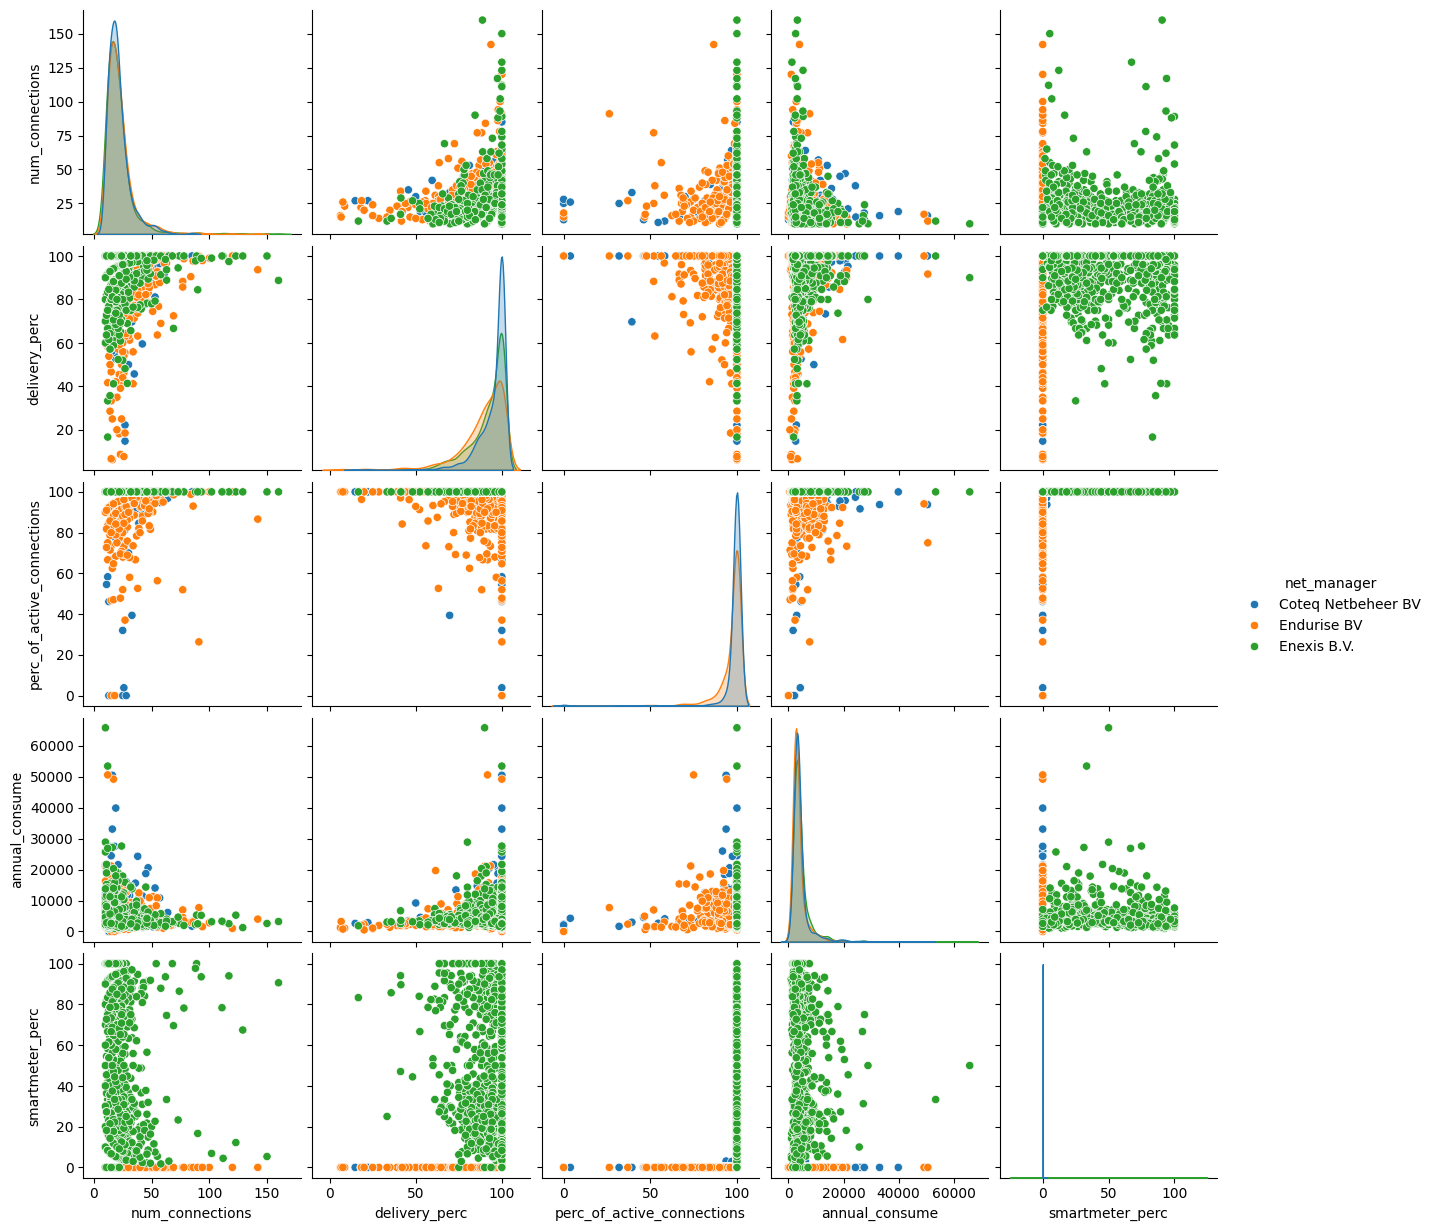

In [7]:
# Pairplot
sns.pairplot(data = df, hue='net_manager')
# Observations: 

# There appears to be something unique about Enexis B.V.
# % active connections appears to be 100 across the board.

# Enexis B.V. also seems to be the only electricity company out of 
# These three that has smartmeter customers. (I will need to look into
# what a smartmeter)

#  delivery_perc: percentage of net consumption of electricity. The lower, the more energy was given back to the grid (for example if you have solar panels)

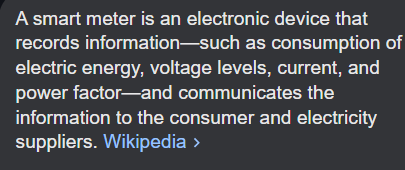

Found via a google search, source: Wikipedia

| Note: |
| --- |
| I have seen a lot of these around in Finland. This begs the question, do we get any extra information from these smart meters that we can use in this dataset? We will also have to keep in mind that there may be some extraeneous variables that might skew the data. |

<Axes: >

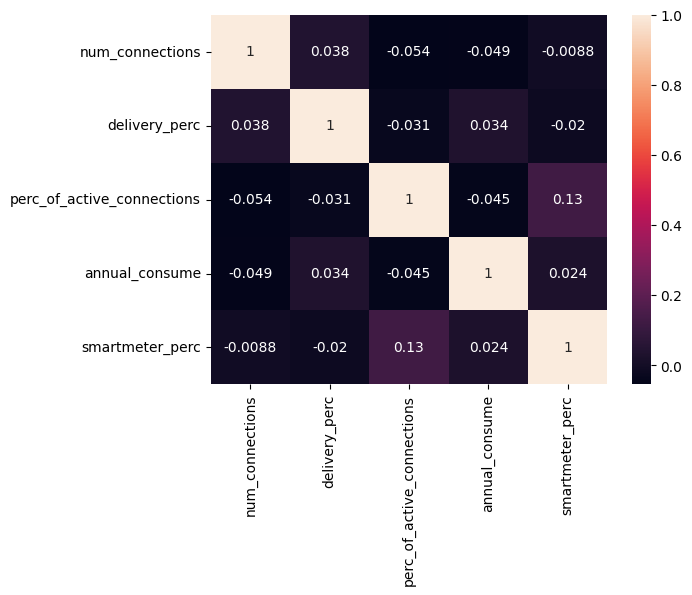

In [8]:
# Heatmap
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True)

# Nothing of note.

In [9]:
# Let's see how many unique cities there are for these three companies.
print(df['city'].nunique())

# There are 460 different types of cities, that is quite a lot. Maybe we can limit
# it to the three biggest cities.



451


In [10]:
# There are 460 different types of cities, that is quite a lot. Maybe we can limit
# it to the 10 bigges cities to see if we can find something unique

# I took this from ChatGPT With the prompt:
# print(df['city'].value_counts().head(5)) how to turn this into a filter.
most_customer_cities = df['city'].value_counts().head(5).index
df_top_cities = df[df['city'].isin(most_customer_cities)]
df_top_cities['net_manager'].value_counts()

net_manager
Coteq Netbeheer BV    1000
Endurise BV            206
Name: count, dtype: int64

In [11]:
#
df_smartmeter = df[df['smartmeter_perc'] > 0]
df_smartmeter

,net_manager,street,city,num_connections,delivery_perc,perc_of_active_connections,type_of_connection,annual_consume,smartmeter_perc
162,Coteq Netbeheer BV,Eschstraat,OLDENZAAL,32,96.88,93.75,3x25,2761.00,3.13
540,Coteq Netbeheer BV,Grotestraat,GOOR,34,100.00,97.06,1x35,6154.00,2.94
2000,Enexis B.V.,Sortestraat,LIEMPDE,11,81.82,100.00,3x25,6063.55,9.09
2001,Enexis B.V.,Riegheide,BOVENSMILDE,29,68.97,100.00,1x35,2653.93,68.97
2002,Enexis B.V.,Bosscheweg,DRUNEN,23,82.61,100.00,3x25,6788.43,21.74
...,...,...,...,...,...,...,...,...,...
2994,Enexis B.V.,Woortmanslaan,WILDERVANK,22,90.91,100.00,1x35,4673.64,9.09
2995,Enexis B.V.,Generaal Kockstraat,TILBURG,37,100.00,100.00,1x35,1483.22,83.78
2996,Enexis B.V.,Kapelweg,LEUNEN,11,100.00,100.00,3x25,8056.45,18.18
2997,Enexis B.V.,Castellum,CUIJK,62,98.39,100.00,1x35,1704.66,93.55


In [12]:
# The top ten cities that use smartmeter. (the customer has a smartmeter > 0)
df_smartmeter['city'].value_counts().head(10)

city
EINDHOVEN           40
BREDA               29
TILBURG             29
GRONINGEN           29
HENGELO OV          25
ENSCHEDE            25
ZWOLLE              24
MAASTRICHT          20
'S-HERTOGENBOSCH    20
DEVENTER            18
Name: count, dtype: int64

In [13]:
# Confirmation that all of the smartmeter users belong to the Enexis B.V
# electricity company.
df_smartmeter['net_manager'].value_counts().head(10)

net_manager
Enexis B.V.           981
Coteq Netbeheer BV      2
Name: count, dtype: int64

In [19]:
df

,net_manager,street,city,num_connections,delivery_perc,perc_of_active_connections,type_of_connection,annual_consume,smartmeter_perc
0,Coteq Netbeheer BV,Bleijenbeek,ALMELO,14,85.71,100.0,1x35,2898.00,0.00
1,Coteq Netbeheer BV,Watersnipstraat,GOOR,41,97.56,100.0,1x35,4752.00,0.00
2,Coteq Netbeheer BV,Johannes Bosboomstraat,ALMELO,14,100.00,100.0,1x35,3827.00,0.00
3,Coteq Netbeheer BV,Goossenmaatsweg,ALMELO,18,100.00,100.0,1x35,3295.00,0.00
4,Coteq Netbeheer BV,De Valk,ALMELO,20,95.00,100.0,1x35,3319.00,0.00
...,...,...,...,...,...,...,...,...,...
2995,Enexis B.V.,Generaal Kockstraat,TILBURG,37,100.00,100.0,1x35,1483.22,83.78
2996,Enexis B.V.,Kapelweg,LEUNEN,11,100.00,100.0,3x25,8056.45,18.18
2997,Enexis B.V.,Castellum,CUIJK,62,98.39,100.0,1x35,1704.66,93.55
2998,Enexis B.V.,Reigerstraat,SITTARD,15,100.00,100.0,1x25,2611.07,0.00


<Axes: xlabel='net_manager', ylabel='perc_of_active_connections'>

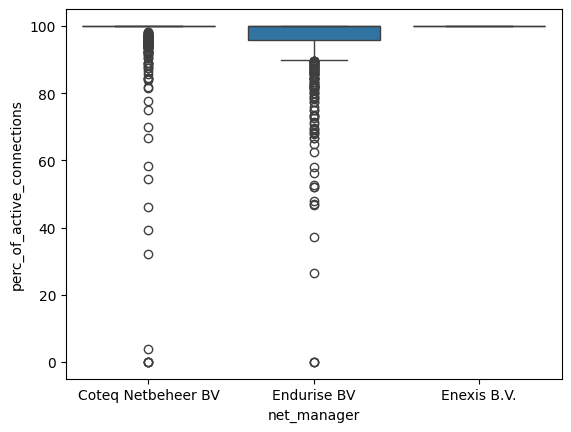

In [25]:
# A boxplot of active connections for each net manager
sns.boxplot(df, x='net_manager', y='perc_of_active_connections')

# Observations: 
# It appears that Enexis BV in fact has the most active connection % 
# Out of the three. Recall that this column means:
# The amount of active connections in the zipcode they belong to.

<Axes: xlabel='net_manager', ylabel='num_connections'>

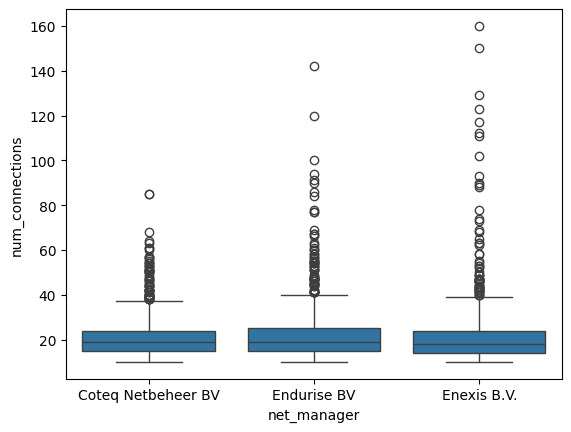

In [26]:
# Boxplot of the distributions of numbers of connections per client by company.
sns.boxplot(df,x='net_manager', y='num_connections')

# Observations:
# It appears that out of all three companies, Enexis B.V. has the most clients
# that have an outlier number of connections. Meaning, they have clients with 
# a number of connections outside of the whisker of the box plot.

# Whereas Coteq has the most standard connections.

In [28]:
# Counting the number of customers a single street has.
df['street'].value_counts()

# Observations:
# Wilheminastraat and Ootmarsumsestraat have the most clients. It would be interesting to see
# If they all belong to the same company or if the company is contested.

street
Wilhelminastraat     14
Ootmarsumsestraat    14
Schoolstraat         13
Grotestraat          12
Nieuwstraat          12
                     ..
Iepebeek              1
Barietdijk            1
Woenselse Markt       1
Paterswoldseweg       1
IJsseldijk            1
Name: count, Length: 2304, dtype: int64

In [41]:
# Find the value counts of the busiest two streets. Wilhelminastraat and Ootmarsumsestraat.

# Filtered dataframes
Wilhelminastraat_df = df[df['street'] == 'Wilhelminastraat']
Ootmarsumsestraat_df = df[df['street'] == 'Ootmarsumsestraat']

# Counting the values of each row's net_manager
Wilhelminastraat_df['net_manager'].value_counts()


net_manager
Endurise BV           8
Enexis B.V.           4
Coteq Netbeheer BV    2
Name: count, dtype: int64

In [40]:
Ootmarsumsestraat_df['net_manager'].value_counts()

# Observations: 
# Ootmarsumsestraat has only one net_manager, Coteq BV. 
# Wilhelminastraat has all three net_managers, which begs the question
# Whether or not these grid operators are effectively being distributed 
# Properly, or is there something we are not seeing.

net_manager
Coteq Netbeheer BV    14
Name: count, dtype: int64

In [43]:
# Checking to see if each row has the same city for 'Ootmarsumsestraat'
Ootmarsumsestraat_df['city'].value_counts()

city
ALMELO       13
OLDENZAAL     1
Name: count, dtype: int64

In [44]:
# Checking to see if each row has the same city for 'Wilhelminastraat_df'
Wilhelminastraat_df['city'].value_counts()

# Observations: 
# So the 'lurking variable' was that this street name exists in many cities (the 
# ones below.)

city
KORTGENE            2
KRABBENDIJKE        2
OLDENZAAL           1
ALMELO              1
ZAAMSLAG            1
SINT PHILIPSLAND    1
POORTVLIET          1
STAVENISSE          1
NIJVERDAL           1
MIERLO              1
HOENSBROEK          1
EMMEN               1
Name: count, dtype: int64

---
# Conclusions 

There does not appear to be very much insight in this dataset (or at least with the three companies that I chose to concatinate to make the dataset)

We found that Enexis ended up having the only smart users in the 3000 row sample. 

We also found that the top 5 smartmeter users are Groningen, Eindhoven, Tilburg, and Breda for Enexis.

We found that Enexis B.V. has the most outlier clients with a significant number of connections. Perhaps we can infer that they have a number of commercial clients.

We found that Wilheminastraat is a very common name for a street and exists in many different 
Dutch cities.


# Improvements:

We could likely find more insights if we used multiple years for the datasets (they are available and would make a great notebook exercise for more points in the future.) Making this into a timeseries dataset using concatination and more companies could also be a possibility. 

I believe that the main way to receive more insight from this dataset would be to concatinate many datasets for each year and many different companies to find whether or not smartmeter is being used more in The Netherlands and where. 

